In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import math as mt
from joblib import dump, load
import datetime
from sklearn.model_selection import train_test_split
from time import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load Input Data

In [2]:
# Load Inputs
# Load X and y values
X = load('X.joblib') 
y= load('y.joblib')


# Randomaly  Spit train test (20%) 

In [3]:
X_train,X_test,y_train,y_test= train_test_split(X ,y,test_size=0.20, random_state=0)

# Fit model  train data and test it on test data

Coefficient of determination of base LR model on test data is , 0.5300325404572916


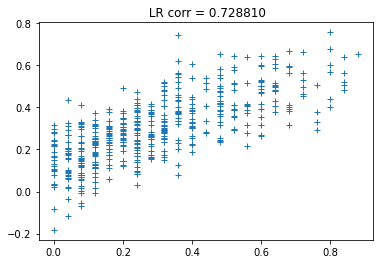

In [4]:
#regLin=SVR(C=30,gamma='scale',kernel='rbf',epsilon=0.01).fit(X_train, y_train)
regLin=LinearRegression().fit(X_train, y_train)
acc_svr       =regLin.score(X_test, y_test) 
print("Coefficient of determination of base LR model on test data is ,",(acc_svr))
yy_test = regLin.predict(X_test)
test_corr = np.corrcoef(yy_test,y_test)[0,1]
plt.title(' LR corr = %f'%test_corr)
plt.plot(y_test,yy_test,'+')

In [5]:
dump(regLin, 'LRModel.joblib') 

['LRModel.joblib']

# Predict all data

In [6]:
yLR=regLin.predict(X)
y_predLin_ds=xr.Dataset({'yLR': (('time'), yLR)}, coords={'time': y.time})
dump(y_predLin_ds.yLR,'TSdataLR.joblib')

['TSdataLR.joblib']

# PLot TS 

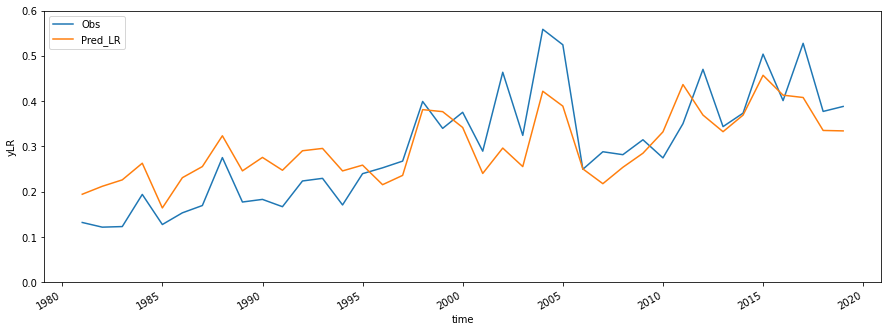

In [7]:

plt.figure(figsize=[15,5])
y.resample(time='1Y').mean().plot(label='Obs')
y_predLin_ds.resample(time='1Y').mean().yLR.plot(label='Pred_LR')
#dump(y,'TS1dataObs_1.joblib')
plt.ylim(0, 0.6)
plt.legend()


# Get Categorial Fog days

In [9]:
### no fog 0 (<=0.02) , medium fog 1-11 (>0.02 && <=0.46) , widespread fog >11 (>0.46)

ynf=y[y<0.040].shape[0]
print(ynf)

yintf=y[(y<=0.46) & (y>=0.04)].shape[0]
print(yintf)

yWd=y[y>0.46].shape[0]
print(yWd)




yLRnf=y_predLin_ds.yLR[y_predLin_ds.yLR<0.040].shape[0]
print(yLRnf)

yLRintf=y_predLin_ds.yLR[(y_predLin_ds.yLR<=0.46) & (y_predLin_ds.yLR>=0.040)].shape[0]
print(yLRintf)

yLRWd=y_predLin_ds.yLR[y_predLin_ds.yLR>0.46].shape[0]
print(yLRWd)


print((ynf+yintf+yWd))
print((yLRnf+yLRintf+yLRWd))


125
1705
588
84
1977
357
2418
2418


Text(0.5, 1.0, 'CNN')

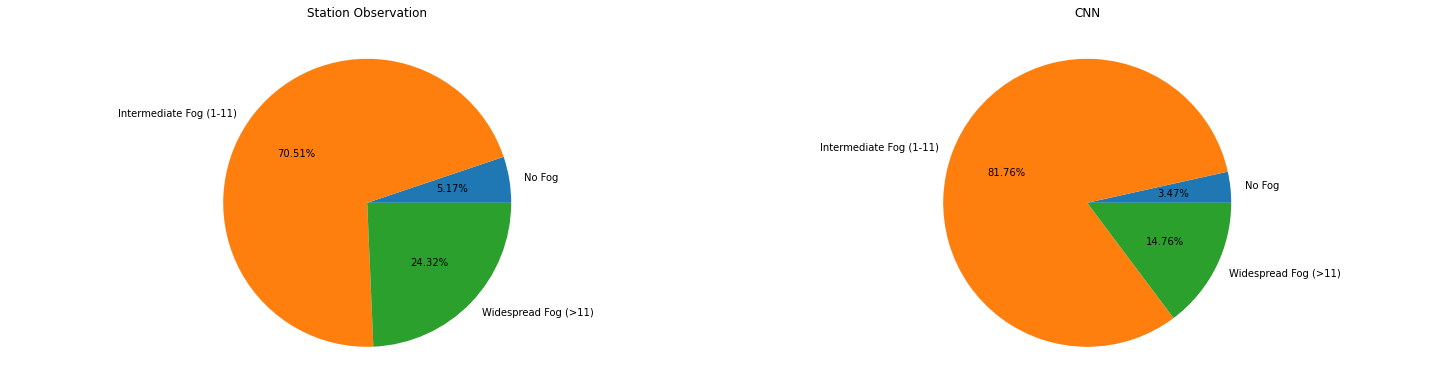

In [10]:
fig = plt.figure(figsize=[10,5])
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
pieLabs = ['No Fog', 'Intermediate Fog (1-11)', 'Widespread Fog (>11)']
piedata = [ynf,yintf,yWd]
ax.pie(piedata, labels = pieLabs,autopct='%1.2f%%')
ax.set_title('Station Observation')
ax1 = fig.add_axes([1,0,1,1])
ax1.axis('equal')
pieLabs = ['No Fog', 'Intermediate Fog (1-11)', 'Widespread Fog (>11)']
piedata = [yLRnf,yLRintf,yLRWd]
ax1.pie(piedata, labels = pieLabs,autopct='%1.2f%%')
ax1.set_title('CNN')

In [16]:
ynf=y.where(y<0.040, drop=True)
print(ynf.shape[0])

yint1=y.where(y>=0.04,drop=True)
yintf=yint1.where(yint1<0.48,drop=True)
print(yintf.shape[0])

yWd=y.where(y>=0.48, drop=True)
print(yWd.shape[0])

print((ynf.shape[0]+yintf.shape[0]+yWd.shape[0]))

yLRnf=y_predLin_ds.where(y_predLin_ds.yLR<0.04,drop=True)
print(yLRnf.yLR.shape[0])

yLRint1=y_predLin_ds.where(y_predLin_ds.yLR>=0.04,drop=True)
yLRintf=yLRint1.where(yLRint1<0.48,drop=True)
print(yLRintf.yLR.shape[0])

yLRWd=y_predLin_ds.where(y_predLin_ds.yLR>=0.48,drop=True)
print(yLRWd.yLR.shape[0])

print((yLRnf.yLR.shape[0]+yLRintf.yLR.shape[0]+yLRWd.yLR.shape[0]))

125
1705
588
2418
84
2034
300
2418


# PLot pie chart of different Categories

Text(0.5, 1.0, 'LR')

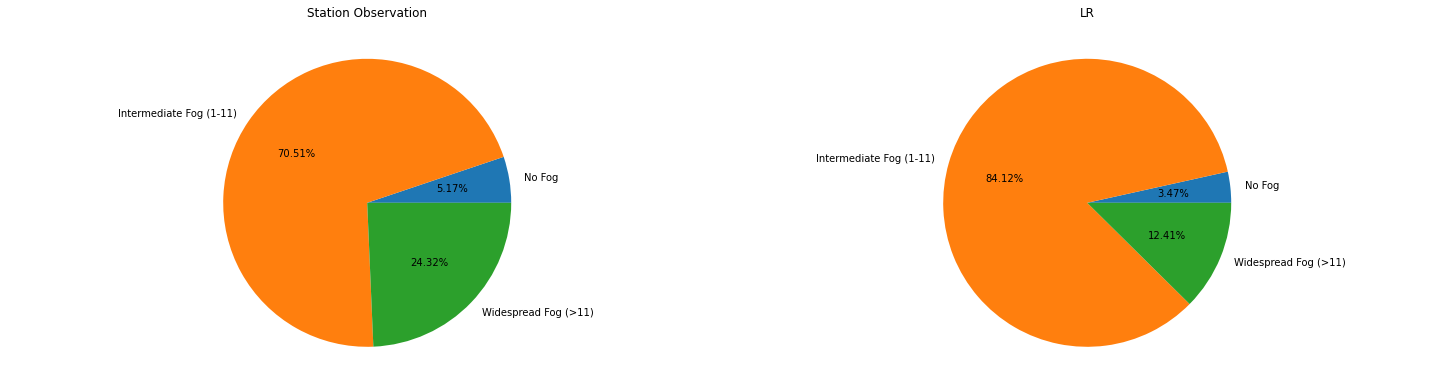

In [17]:
fig = plt.figure(figsize=[10,5])
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
pieLabs = ['No Fog', 'Intermediate Fog (1-11)', 'Widespread Fog (>11)']
piedata = [ynf.shape[0],yintf.shape[0],yWd.shape[0]]
ax.pie(piedata, labels = pieLabs,autopct='%1.2f%%')
ax.set_title('Station Observation')
ax1 = fig.add_axes([1,0,1,1])
ax1.axis('equal')
pieLabs = ['No Fog', 'Intermediate Fog (1-11)', 'Widespread Fog (>11)']
piedata = [yLRnf.yLR.shape[0],yLRintf.yLR.shape[0],yLRWd.yLR.shape[0]]
ax1.pie(piedata, labels = pieLabs,autopct='%1.2f%%')
ax1.set_title('LR')

In [18]:
pie1dataObs = [ynf.shape[0],yintf.shape[0],yWd.shape[0]]
pie1dataLR = [yLRnf.yLR.shape[0],yLRintf.yLR.shape[0],yLRWd.yLR.shape[0]]
#dump(pie1dataObs, 'pie1dataObs_1.joblib') 
dump(pie1dataLR,'piedataLR.joblib')

['piedataLR.joblib']